### El proposito de este notebook es el analisis del data frame 'ds_salaries.csv' cuya informacion proviene del siguiente link

link = https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

### Primero debemos importar las librerias con las que vamos a trbajar

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import pandas as pd

In [2]:
# Cargamos los datos
df = pd.read_csv('C:/Users/Usuario/Documents/PortafolioDS/DATA/ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
# Vemos que tipo de datos contiene nuestro data frame
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [4]:
# Cambiamos tipos de datos a catrgoricos
df['experience_level'] = df['experience_level'].astype('category')
df['employment_type'] = df['employment_type'].astype('category')
df['job_title'] = df['job_title'].astype('category')
df['salary_currency'] = df['salary_currency'].astype('category')
df['employee_residence'] = df['employee_residence'].astype('category')
df['company_location'] = df['company_location'].astype('category')
df['company_size'] = df['company_size'].astype('category')

# Cambiamos los tipos de datos a float
df['salary_in_usd'] = df['salary_in_usd'].astype(float)

#Eliminamos las columnas que no vamos a usar
df = df.drop(['salary','work_year','salary_currency'], axis = 1)

# Hacemos que los datos tipo float se muestren separados por comas en los miles y sin decimales
pd.options.display.float_format = '{:,.0f}'.format

df

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,SE,FT,Principal Data Scientist,"85,847",ES,100,ES,L
1,MI,CT,ML Engineer,"30,000",US,100,US,S
2,MI,CT,ML Engineer,"25,500",US,100,US,S
3,SE,FT,Data Scientist,"175,000",CA,100,CA,M
4,SE,FT,Data Scientist,"120,000",CA,100,CA,M
...,...,...,...,...,...,...,...,...
3750,SE,FT,Data Scientist,"412,000",US,100,US,L
3751,MI,FT,Principal Data Scientist,"151,000",US,100,US,L
3752,EN,FT,Data Scientist,"105,000",US,100,US,S
3753,EN,CT,Business Data Analyst,"100,000",US,100,US,L


#### Luego de haber realizado los cambios necesarios en nuestro data frame podemos empezar a analizar y visualizar los datos

En este caso usaremos analisis univariado y bivariado unicamente, ya que la mayoria de nuestros datos son categoricos

In [5]:
# Establecemos el estilo de las graficas
sns.set(style = 'darkgrid', context = 'notebook')

### Analisis univariado

Aqui tomaremos las variables: company size, job tilte, company location y remote ratio una a una para poder sacar conclusiones sobre las categorias que pertenecen a cada variable

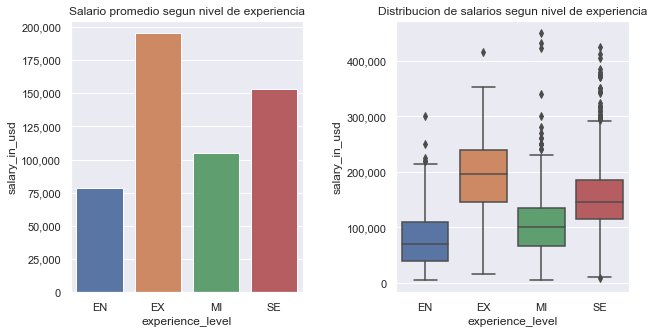

In [6]:
#Agrupamos los valores por nivel de experiencia y ordenamos los promedios de mayor a menor
niveles = df.groupby('experience_level')['salary_in_usd'].mean().reset_index().sort_values('salary_in_usd', ascending = False)

# Creamos la figura y los subgráficos
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 fila, 2 columnas

# Creamos grafico de barras
sns.barplot(data=niveles,x='experience_level', y='salary_in_usd', ax = axs[0])
axs[0].set_title('Salario promedio segun nivel de experiencia')

# Creamos un box plot
sns.boxplot(data=df,x='experience_level',y='salary_in_usd', ax = axs[1])
axs[1].set_title('Distribucion de salarios segun nivel de experiencia')

# Configuramos los separadores de miles en el eje y
formateador = ticker.StrMethodFormatter("{x:,.0f}")
axs[0].yaxis.set_major_formatter(formateador)
axs[1].yaxis.set_major_formatter(formateador)

# Ajustamos el espaciado entre los subgráficos
plt.subplots_adjust(wspace=0.4)

Como es esperado a mayor nivel de experiencia tiene un empleado el promedio de sus ingresos aumenta, pero tambien podemos observar en el diagrama de cajas que existen casos extremos donde el nivel de experiencai es menor pero el salario es mayor.

Esto se puede deber debido al puesto de trabajo o al tamaño de la empresa, averiguemoslo

In [7]:
# Agrupamos por tamaño de la empresa y hacemos un recuento
size = df.groupby('company_size')['job_title'].count().reset_index()
size.columns = ['company_size','count']

total = size['count'].sum()

# Creamos columna de porentajes
size['porcentajes'] = size['count'].apply(lambda x: x/total*100)

size

,company_size,count,porcentajes
0,L,454,12
1,M,3153,84
2,S,148,4


Podemos ver que las empresas medianas contratan muchos mas puestos relacionados con data science que las grandes y las pequeñas

Ahora veamos como se distribuye el nivel de ingresos entre estas categorias

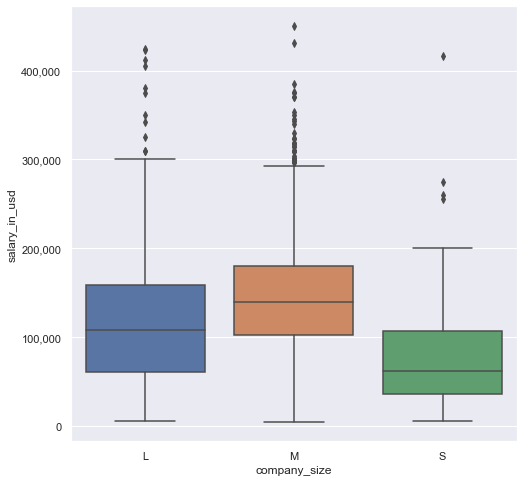

In [8]:
# Ajustamos el tamaño del grafico
plt.figure(figsize=(8,8))

# Creamos un box plot para el tamaño de las empresas por salario
sns.boxplot(data=df,x='company_size',y='salary_in_usd')

# Configuramos los separadores de miles en el eje y
formateador = ticker.StrMethodFormatter("{x:,.0f}")
plt.gca().yaxis.set_major_formatter(formateador)

Gracias al diagrama de cajas podemos ver que las empresas pequeñas pagan menos a sus empleados de ciencia de datos que las medianas y grandes empresas. Pero vemos que existe un empleado que cobra incluso mas de 400mil dolares anuales en esta categoria.

Las empresas medianas pagan en promedio mejor que las empresas grandes, pagando estas aproximadamente 50 mil dolares mas

##### Ahora veamos los puestos mejor y peor pagados por nivel de experiencia y que puesto poseen

In [9]:
# Agrupar por nivel de experiencia los salarios maximos
mejor_pagado = df.groupby('experience_level')['salary_in_usd'].max().reset_index()

# Obtener los índices de los salarios máximos
idx_max_salario = df.groupby('experience_level')['salary_in_usd'].idxmax()

# Agregar la columna 'job_title' al DataFrame 'mejor_pagado'
mejor_pagado['job_title'] = df.loc[idx_max_salario, 'job_title'].reset_index(drop=True)

mejor_pagado

,experience_level,salary_in_usd,job_title
0,EN,"300,000",AI Developer
1,EX,"416,000",Principal Data Scientist
2,MI,"450,000",Research Scientist
3,SE,"423,834",AI Scientist


Los empleados mejor pagados por cada nivel de experiencia tienen salarios de 300 mil dolares anuales o mas, como podemos ver en el puesto de entrada (EN/entry level) el mas alto es de 300 mil. Que comparado con los demas niveles de experiencia tiene una amplia diferencia. En cuanto a los puestos medios, senior y expertos (MI,SE y EX) la diferencia no es muy sustancial.

In [10]:
# Agrupar por nivel de experiencia los salarios minimos
peor_pagados = df.groupby('experience_level')['salary_in_usd'].min().reset_index()

# Obtener los índices de los salarios minimos
idx_min_salario = df.groupby('experience_level')['salary_in_usd'].idxmin()

# Agregar la columna 'job_title' al DataFrame 'peor_pagados'
peor_pagados['job_title'] = df.loc[idx_min_salario, 'job_title'].reset_index(drop=True)

peor_pagados

,experience_level,salary_in_usd,job_title
0,EN,"5,409",Power BI Developer
1,EX,"15,000",Staff Data Analyst
2,MI,"5,132",NLP Engineer
3,SE,"8,000",Product Data Scientist


Para los 4 empleados peor pagados por nivel de experiencia los salarios son mas parejos y se cumple casi a la perfecion la jerarquia de puestos.

### Ahora veamos los salarios promedios por puesto de trabajo

In [19]:
#Sacamos el top 35 de los trabajos que mas ganan en promedio por puesto de trabajo y la cantidad de trabajadores en ese puesto
top_jobst = df.groupby('job_title')['salary_in_usd'].agg(Salario_promedio='mean', Cantidad_empleos='count').sort_values(by='Salario_promedio',ascending=False)
top_jobst = top_jobst.reset_index().head(35)
top_jobst

,job_title,Salario_promedio,Cantidad_empleos
0,Data Science Tech Lead,"375,000",1
1,Cloud Data Architect,"250,000",1
2,Data Lead,"212,500",2
3,Data Analytics Lead,"211,254",2
4,Principal Data Scientist,"198,171",8
5,Director of Data Science,"195,141",11
6,Principal Data Engineer,"192,500",2
7,Machine Learning Software Engineer,"192,420",10
8,Data Science Manager,"191,279",58
9,Applied Scientist,"190,264",58


In [20]:
#Sacamos el top 35 de los trabajos que menos ganan en promedio por puesto de trabajo y la cantidad de trabajadores en ese puesto
low_jobst = df.groupby('job_title')['salary_in_usd'].agg(Salario_promedio='mean', Cantidad_empleos='count').sort_values(by='Salario_promedio',ascending=True)
low_jobst = low_jobst.reset_index().head(35)
low_jobst

,job_title,Salario_promedio,Cantidad_empleos
0,Power BI Developer,"5,409",1
1,Product Data Scientist,"8,000",1
2,Staff Data Analyst,"15,000",1
3,3D Computer Vision Researcher,"21,352",4
4,Autonomous Vehicle Technician,"26,278",2
5,Compliance Data Analyst,"30,000",1
6,Principal Data Architect,"38,154",1
7,Machine Learning Research Engineer,"42,819",4
8,Insight Analyst,"46,786",2
9,Data DevOps Engineer,"53,654",1


Con las dos tablas anteriores podemos ver cuales son los mejores y peores puestos encuanto a salario promedio junto con la frecuancia de estos puestos. 

Por ejemplo, los puestos de Data Engineer, Data Scientist y Machine Learning Engineer son los mas frecuentes con un total de 2169 apariciones y se encuentran en el top 30 con los mejores salarios anuales. 

Encuanto que los tres primeros puestos mejor pagados solo tienen una frecuencia de 4.

En resumen la tabla anterior nos da un indicio que tan factible puede ser para un empleado conseguir cierto puesto junto con un salarios estimado

### Jornadas

In [14]:
niveles = df.groupby('employment_type')['salary_in_usd'].count().reset_index().sort_values('salary_in_usd', ascending = False)
niveles.rename(columns={'salary_in_usd':'count'}, inplace = True)
niveles

,employment_type,count
2,FT,3718
3,PT,17
0,CT,10
1,FL,10


Con la tabla anterior podemos ver que la gran mayoria de trabajadores son de tiempo completo (FT/Full Time), por lo cual no profundizaremos con esta vaiable ya que esta cargada a dicho valor

### Ubicacion de las empresas y empleados

In [15]:
niveles = df.groupby('company_location')['salary_in_usd'].count().reset_index().sort_values('salary_in_usd', ascending = False)
niveles.rename(columns={'salary_in_usd':'count_of_companies'}, inplace = True)
niveles

,company_location,count_of_companies
70,US,3040
28,GB,172
12,CA,87
25,ES,77
38,IN,58
...,...,...
24,EG,1
50,MT,1
49,MK,1
48,MD,1


La gran mayoria de compañias que brindan estos empleos se ubican en los Estados Unidos, seguido de Gran Bretaña y luego Canada

Estados unidos domina con una gran diferencia de 2868 contra el segundo puesto y el total de registros es de 3755

Esto nos evidencia que la gran mayoria de trabajadores prefieren trabajar para compañias ubicadas en los estados unidos

In [16]:
empleados = df.groupby('employee_residence')['salary_in_usd'].count().reset_index().sort_values('salary_in_usd', ascending = False)
empleados.rename(columns={'salary_in_usd':'count_of_employees'}, inplace = True)
empleados

,employee_residence,count_of_employees
75,US,3004
29,GB,167
11,CA,85
26,ES,80
39,IN,71
...,...,...
48,LU,1
46,KW,1
43,JE,1
41,IR,1


Tambien podemos ver que la gran mayoria de trabajadores son residentes de estados unidos, razon por la cual podemos asumir que la mayoria de empresas empleadoras son del mismo pais.  

### Analisis de trabajo remoto
Queremos averiguar si se les paga mejor a los trabajadaores que lo hacen remotamente, a los que estan en la oficina o a los que tienen ambos.

In [17]:
# Sacamos la cuenta de trabajadores por trabajo remoto
remoto = df.groupby('remote_ratio')['employee_residence'].count().reset_index()

# Cambiamos el nombre de las columnas
remoto.rename(columns={'employee_residence':'count'}, inplace = True)

total = remoto['count'].sum()

#Agregamos la columna porcentaje
remoto['porcentaje'] = remoto['count'].apply(lambda x: x/total*100)
remoto

,remote_ratio,count,porcentaje
0,0,1923,51
1,50,189,5
2,100,1643,44


El 51% de los trabajadores en data science trabaja de forma presencial, el 44% de forma remota y solo el 5% lo hace de forma hibrida

Ahora vemaos el rango de salarios que tiene estos 3 grupos

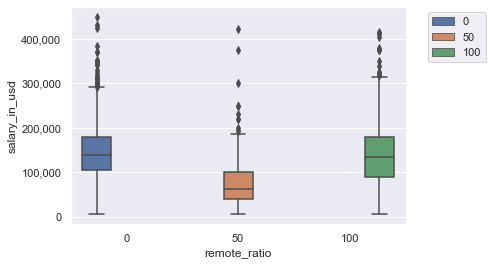

In [18]:
#Graficamos un diagrama de cajas que nos muestren la distribucion de nuestros datos segun su trabajo remoto
sns.boxplot(data=df,x='remote_ratio',y='salary_in_usd',hue='remote_ratio')

# Sacamos la leyenda del grafico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Configuramos los separadores de miles en el eje y
formateador = ticker.StrMethodFormatter("{x:,.0f}")
plt.gca().yaxis.set_major_formatter(formateador)

Los trabajadores presenciales y remotos tiene una distribucion de ingresos muy similar, con unas pequeñas diferencias en sus rangos inter cuartilicos y maximos. El grupo destacado son los trabajadores hibridos que tienen un menor rango salarial y su promedio y maximo son mucho mas bajos.

Mientras que el promedio de los otros grupos ronda los 150 mil dolares los trabajadores hibirdos tiene un promedio que ronda los 65, 75 mil dolares y un sueldo maximo ligeramente menor a los 200 mil dolares.

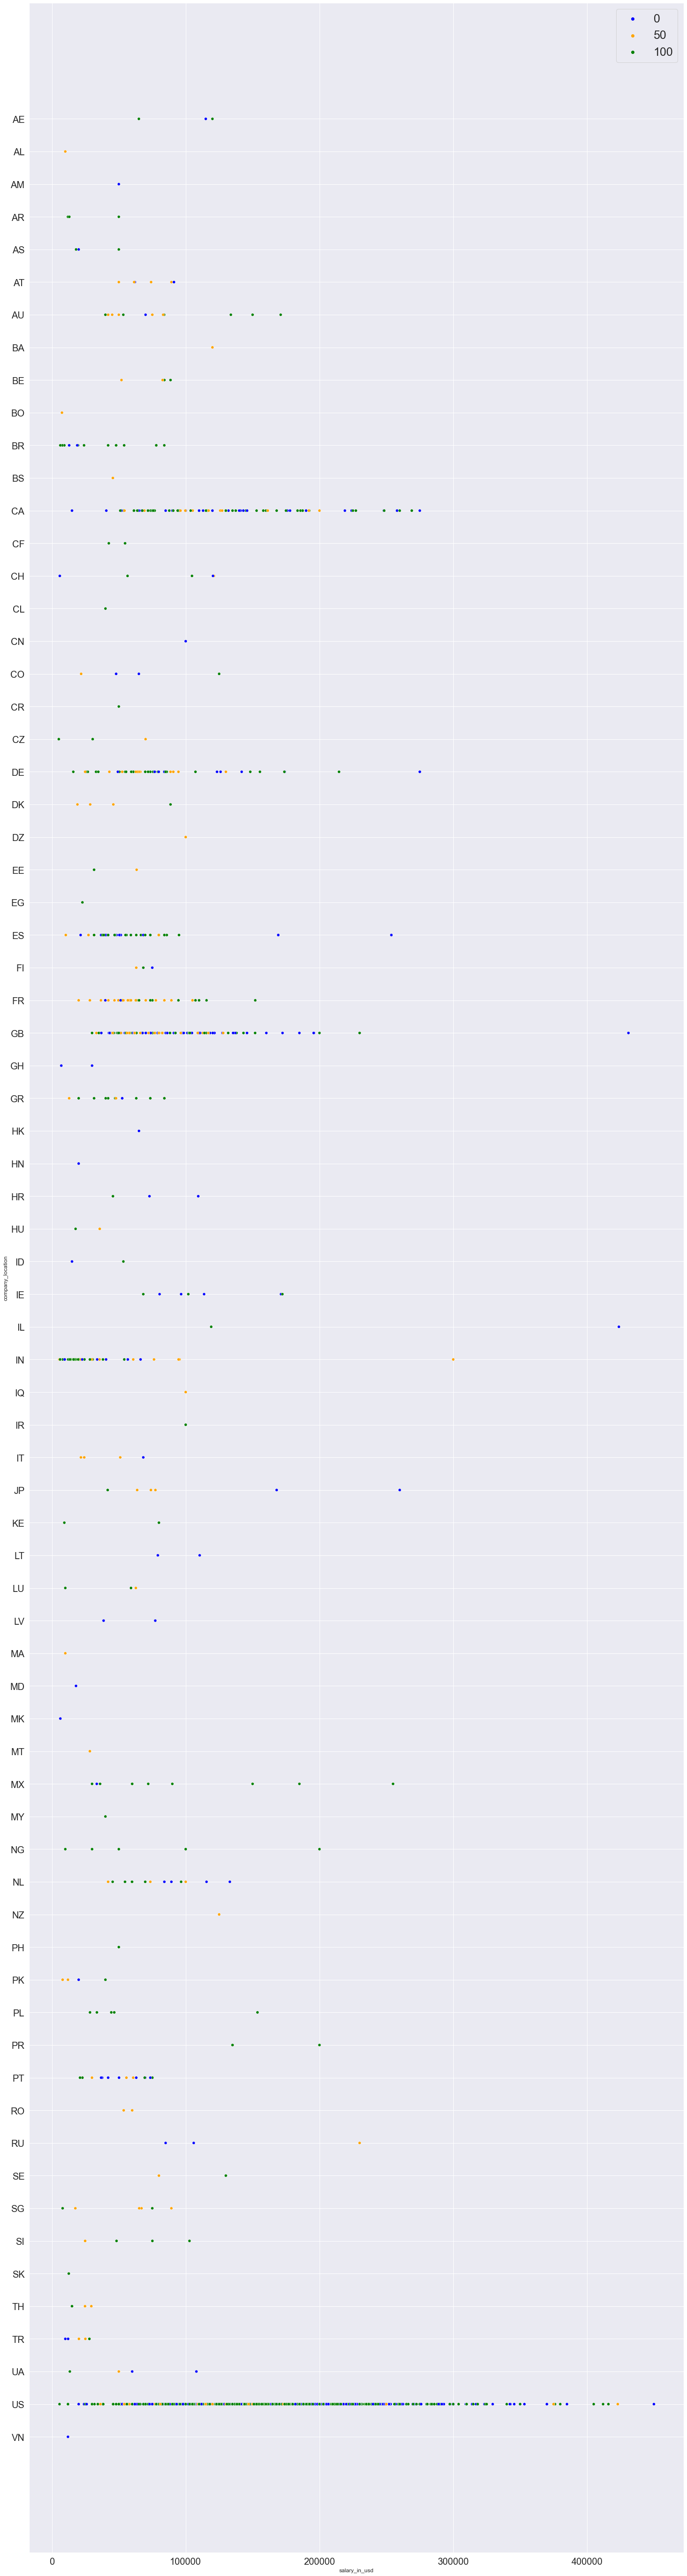

In [32]:
# Definimos el tamano de la figura
plt.figure(figsize=(25,100))

# Creamos el scatterplot o diagrama de dispercion
sns.scatterplot(data=df,x='salary_in_usd',y='company_location',hue='remote_ratio',palette=['blue','orange','green'])

# Llamamos a los ejes
ax = plt.gca()

# Aumentamos el tamaño de los ejes y la etiqueta
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize=25)